In [1]:
import torch
from torch.utils.data import Dataset, DataLoader
import numpy as np
import os
import clip
from torch.nn import functional as F
import torch.nn as nn
from torchvision import transforms
from PIL import Image
train = False
classes = None
pictures= None

def load_data():
    data_list = []
    label_list = []
    texts = []
    images = []
    
    if train:
        text_directory = "/home/ldy/Workspace/THINGS/images_set/training_images"  
    else:
        text_directory = "/home/ldy/Workspace/THINGS/images_set/test_images"
    dirnames = [d for d in os.listdir(text_directory) if os.path.isdir(os.path.join(text_directory, d))]
    dirnames.sort()
    
    if classes is not None:
        dirnames = [dirnames[i] for i in classes]

    for dir in dirnames:
        try:
            idx = dir.index('_')
        except ValueError:
            print(f"Skipped: {dir} due to no '_' found.")
            continue
            
        new_description = f"{description}"
        texts.append(new_description)

    if train:
    else:
        img_directory ="/home/ldy/Workspace/THINGS/images_set/test_images"
    
    all_folders = [d for d in os.listdir(img_directory) if os.path.isdir(os.path.join(img_directory, d))]

    if classes is not None and pictures is not None:
        for i in range(len(classes)):
            class_idx = classes[i]
            pic_idx = pictures[i]
            if class_idx < len(all_folders):
                folder = all_folders[class_idx]
                folder_path = os.path.join(img_directory, folder)
                all_images = [img for img in os.listdir(folder_path) if img.lower().endswith(('.png', '.jpg', '.jpeg'))]
                all_images.sort()
                if pic_idx < len(all_images):
                    images.append(os.path.join(folder_path, all_images[pic_idx]))
    elif classes is not None and pictures is None:
        for i in range(len(classes)):
            class_idx = classes[i]
            if class_idx < len(all_folders):
                folder = all_folders[class_idx]
                folder_path = os.path.join(img_directory, folder)
                all_images = [img for img in os.listdir(folder_path) if img.lower().endswith(('.png', '.jpg', '.jpeg'))]
                all_images.sort()
                images.extend(os.path.join(folder_path, img) for img in all_images)
    elif classes is None:
        for folder in all_folders:
            folder_path = os.path.join(img_directory, folder)
            all_images = [img for img in os.listdir(folder_path) if img.lower().endswith(('.png', '.jpg', '.jpeg'))]
            all_images.sort()  
            images.extend(os.path.join(folder_path, img) for img in all_images)
    else:
        print("Error")
    return texts, images
texts, images = load_data()
# images

In [2]:
if classes is None and pictures is None:
    # features_filename = os.path.join('/home/geek/Workspace/BCI/Data/THINGS/CLIP', 'features_train.pt') if train else os.path.join('/home/geek/Workspace/BCI/Data/THINGS/CLIP', 'features_test.pt')
    features_filename = os.path.join('/home/geek/Workspace/BCI/Data/THINGS/CLIP', 'new_features_train.pt') if train else os.path.join('/home/geek/Workspace/BCI/Data/THINGS/CLIP', 'features_test.pt')
    if os.path.exists(features_filename) :
        saved_features = torch.load(features_filename)
        text_features = saved_features['new_text_features']
        img_features = saved_features['new_img_features']
eeg_features =  torch.load(os.path.join('.', 'train_pos_img_eeg_features.pt'))

# eeg_features.shape
text_features.shape
img_features.shape

NameError: name 'text_features' is not defined

In [2]:
if classes is None and pictures is None:
    features_filename = os.path.join('/home/ldy/Workspace/THINGS/CLIP', 'features_train.pt') if train else os.path.join('/home/ldy/Workspace/THINGS/CLIP', 'features_test.pt')
    
    if os.path.exists(features_filename) :
        saved_features = torch.load(features_filename)
        text_features = saved_features['text_features']
        img_features = saved_features['img_features']
img_features.shape
text_features.shape

torch.Size([200, 512])

In [ ]:
img_features.shape

/home/ldy/miniconda3/envs/BCI/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


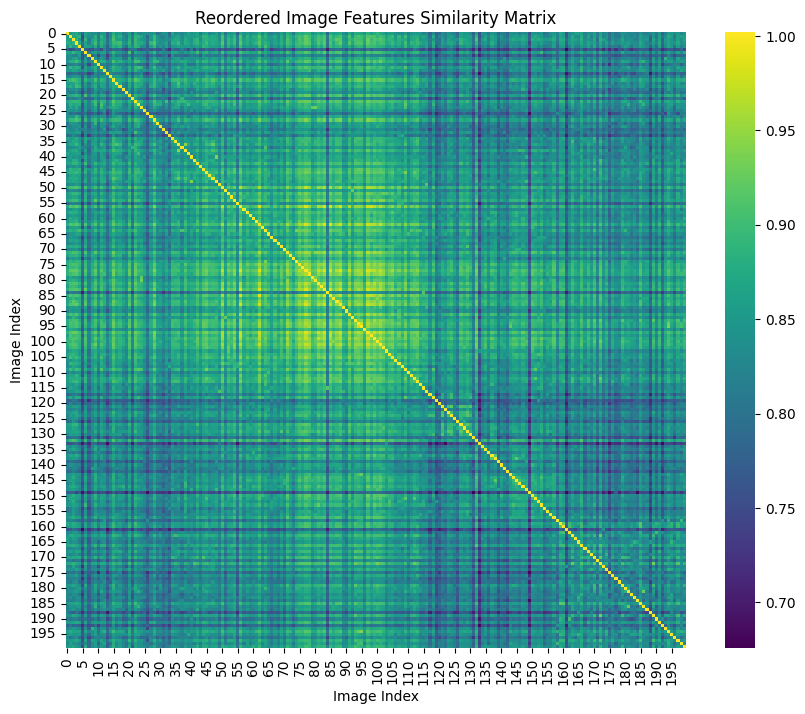

In [6]:
import torch
import matplotlib.pyplot as plt
import seaborn as sns
# img_features = img_features[::10]
# Function to calculate cosine similarity in batches
def batch_cosine_similarity(features, batch_size=50):
    n = features.shape[0]
    similarity_matrix = torch.zeros((n, n))

    for start in range(0, n, batch_size):
        end = min(start + batch_size, n)
        batch = features[start:end]

        # Computing similarity with all other features
        for other_start in range(0, n, batch_size):
            other_end = min(other_start + batch_size, n)
            other_batch = features[other_start:other_end]

            sim = torch.nn.functional.cosine_similarity(batch[:, None, :], other_batch[None, :, :], dim=2)
            similarity_matrix[start:end, other_start:other_end] = sim

    return similarity_matrix

# Assuming img_features is loaded
# For demonstration, let's create a dummy tensor for img_features
# Replace the following line with your actual tensor loaded from the file
# img_features = torch.rand(100, 128)  # 100 images with 128-dimensional features
text_features_np = text_features.cpu().numpy()
# Calculate the cosine similarity in batches
similarity_matrix = batch_cosine_similarity(text_features)

from sklearn.cluster import KMeans
import numpy as np

num_clusters = 5

kmeans = KMeans(n_clusters=num_clusters)

concept_labels = kmeans.fit_predict(text_features_np)

sorted_indices = np.argsort(concept_labels)
sorted_similarity_matrix = similarity_matrix[sorted_indices, :]
sorted_similarity_matrix = sorted_similarity_matrix[:, sorted_indices]

plt.figure(figsize=(10, 8))
sns.heatmap(sorted_similarity_matrix, cmap='viridis')
plt.title('Reordered Image Features Similarity Matrix')
plt.xlabel('Image Index')
plt.ylabel('Image Index')

plt.savefig("fig_text.png")
plt.show()

/home/ldy/miniconda3/envs/BCI/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


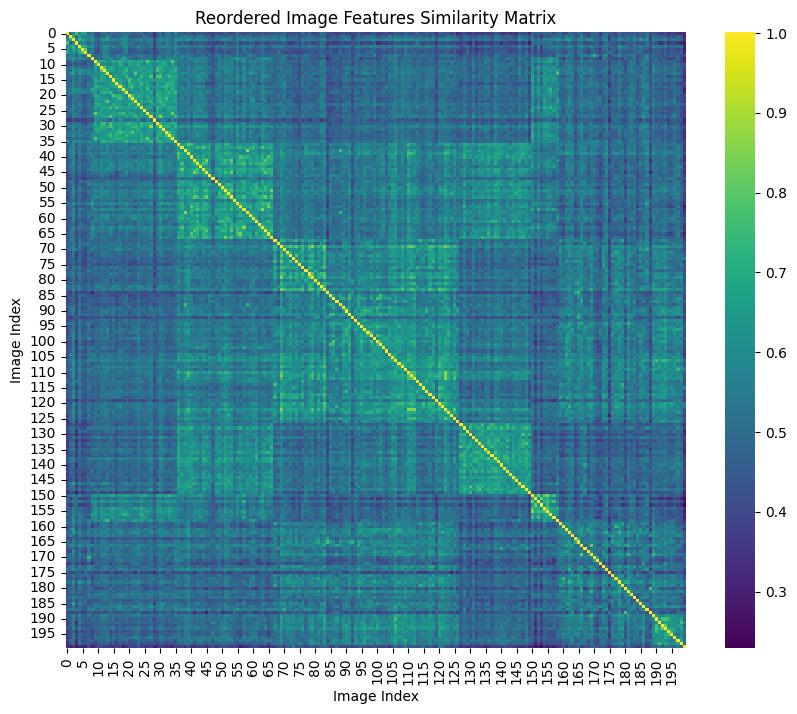

In [11]:
import torch
import matplotlib.pyplot as plt
import seaborn as sns
img_features = img_features
# Function to calculate cosine similarity in batches
def batch_cosine_similarity(features, batch_size=50):
    n = features.shape[0]
    similarity_matrix = torch.zeros((n, n))

    for start in range(0, n, batch_size):
        end = min(start + batch_size, n)
        batch = features[start:end]

        # Computing similarity with all other features
        for other_start in range(0, n, batch_size):
            other_end = min(other_start + batch_size, n)
            other_batch = features[other_start:other_end]

            sim = torch.nn.functional.cosine_similarity(batch[:, None, :], other_batch[None, :, :], dim=2)
            similarity_matrix[start:end, other_start:other_end] = sim

    return similarity_matrix

# Assuming img_features is loaded
# For demonstration, let's create a dummy tensor for img_features
# Replace the following line with your actual tensor loaded from the file
# img_features = torch.rand(100, 128)  # 100 images with 128-dimensional features
img_features_np = img_features.cpu().numpy()
# Calculate the cosine similarity in batches
similarity_matrix = batch_cosine_similarity(img_features)

from sklearn.cluster import KMeans
import numpy as np

num_clusters = 10

kmeans = KMeans(n_clusters=num_clusters)

concept_labels = kmeans.fit_predict(img_features_np)

sorted_indices = np.argsort(concept_labels)
sorted_similarity_matrix = similarity_matrix[sorted_indices, :]
sorted_similarity_matrix = sorted_similarity_matrix[:, sorted_indices]

plt.figure(figsize=(10, 8))
sns.heatmap(sorted_similarity_matrix, cmap='viridis')
plt.title('Reordered Image Features Similarity Matrix')
plt.xlabel('Image Index')
plt.ylabel('Image Index')

plt.savefig("fig_img.png")
plt.show()

In [5]:

# img_features = img_features[::10]
img_features.shape

torch.Size([1654, 512])

/home/ldy/miniconda3/envs/BCI/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


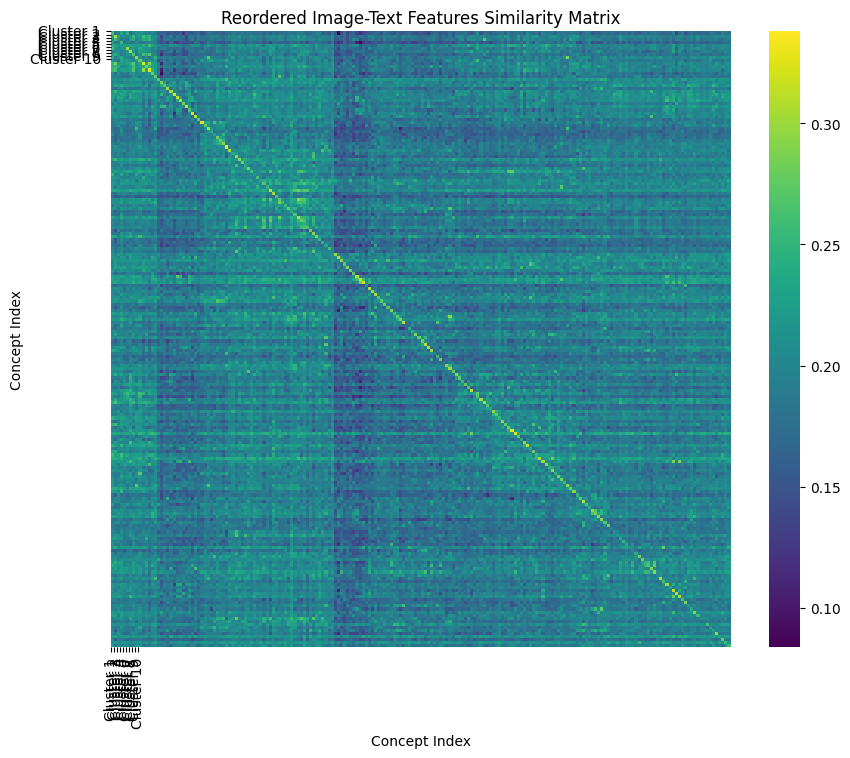

In [10]:
import torch
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.cluster import KMeans

# Function to calculate cosine similarity in batches
def batch_cosine_similarity(features1, features2, batch_size=10):
    n1 = features1.shape[0]
    n2 = features2.shape[0]
    similarity_matrix = torch.zeros((n1, n2))

    for start1 in range(0, n1, batch_size):
        end1 = min(start1 + batch_size, n1)
        batch1 = features1[start1:end1]

        for start2 in range(0, n2, batch_size):
            end2 = min(start2 + batch_size, n2)
            batch2 = features2[start2:end2]

            sim = torch.nn.functional.cosine_similarity(batch1[:, None, :], batch2[None, :, :], dim=2)
            similarity_matrix[start1:end1, start2:end2] = sim

    return similarity_matrix

# Calculate the cosine similarity between image and text features
similarity_matrix = batch_cosine_similarity(img_features, text_features)

# Perform clustering (K-means clustering)
num_clusters = 5
kmeans = KMeans(n_clusters=num_clusters)
concept_labels = kmeans.fit_predict(similarity_matrix.T)  # Transpose similarity_matrix for concept clustering

# Reorder the similarity_matrix based on concept_labels
sorted_indices = torch.argsort(torch.tensor(concept_labels))
sorted_similarity_matrix = similarity_matrix[:, sorted_indices]
sorted_similarity_matrix = sorted_similarity_matrix[sorted_indices, :]

# Plotting the reordered similarity matrix
plt.figure(figsize=(10, 8))
sns.heatmap(sorted_similarity_matrix, cmap='viridis')
plt.title('Reordered Image-Text Features Similarity Matrix')
plt.xlabel('Concept Index')
plt.ylabel('Concept Index')
plt.xticks(ticks=range(0, num_clusters), labels=[f'Cluster {i+1}' for i in range(num_clusters)])
plt.yticks(ticks=range(0, num_clusters), labels=[f'Cluster {i+1}' for i in range(num_clusters)])
plt.savefig("fig_text_img_1654.png")
plt.show()
 

In [ ]:
eeg_features[:1654].shape